# Applying PCA to the breast cancer dataset for visualization


In [7]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


#### How many data points and features are there?

In [10]:
# add your code here
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

#### How many observations do we have from each class?

In [14]:
# add your code here
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

#### What are the available features?

In [11]:
# add your code here
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### How can we understand 30-dimension data?

Let's start with histograms!

In [12]:
import matplotlib.pyplot as plt

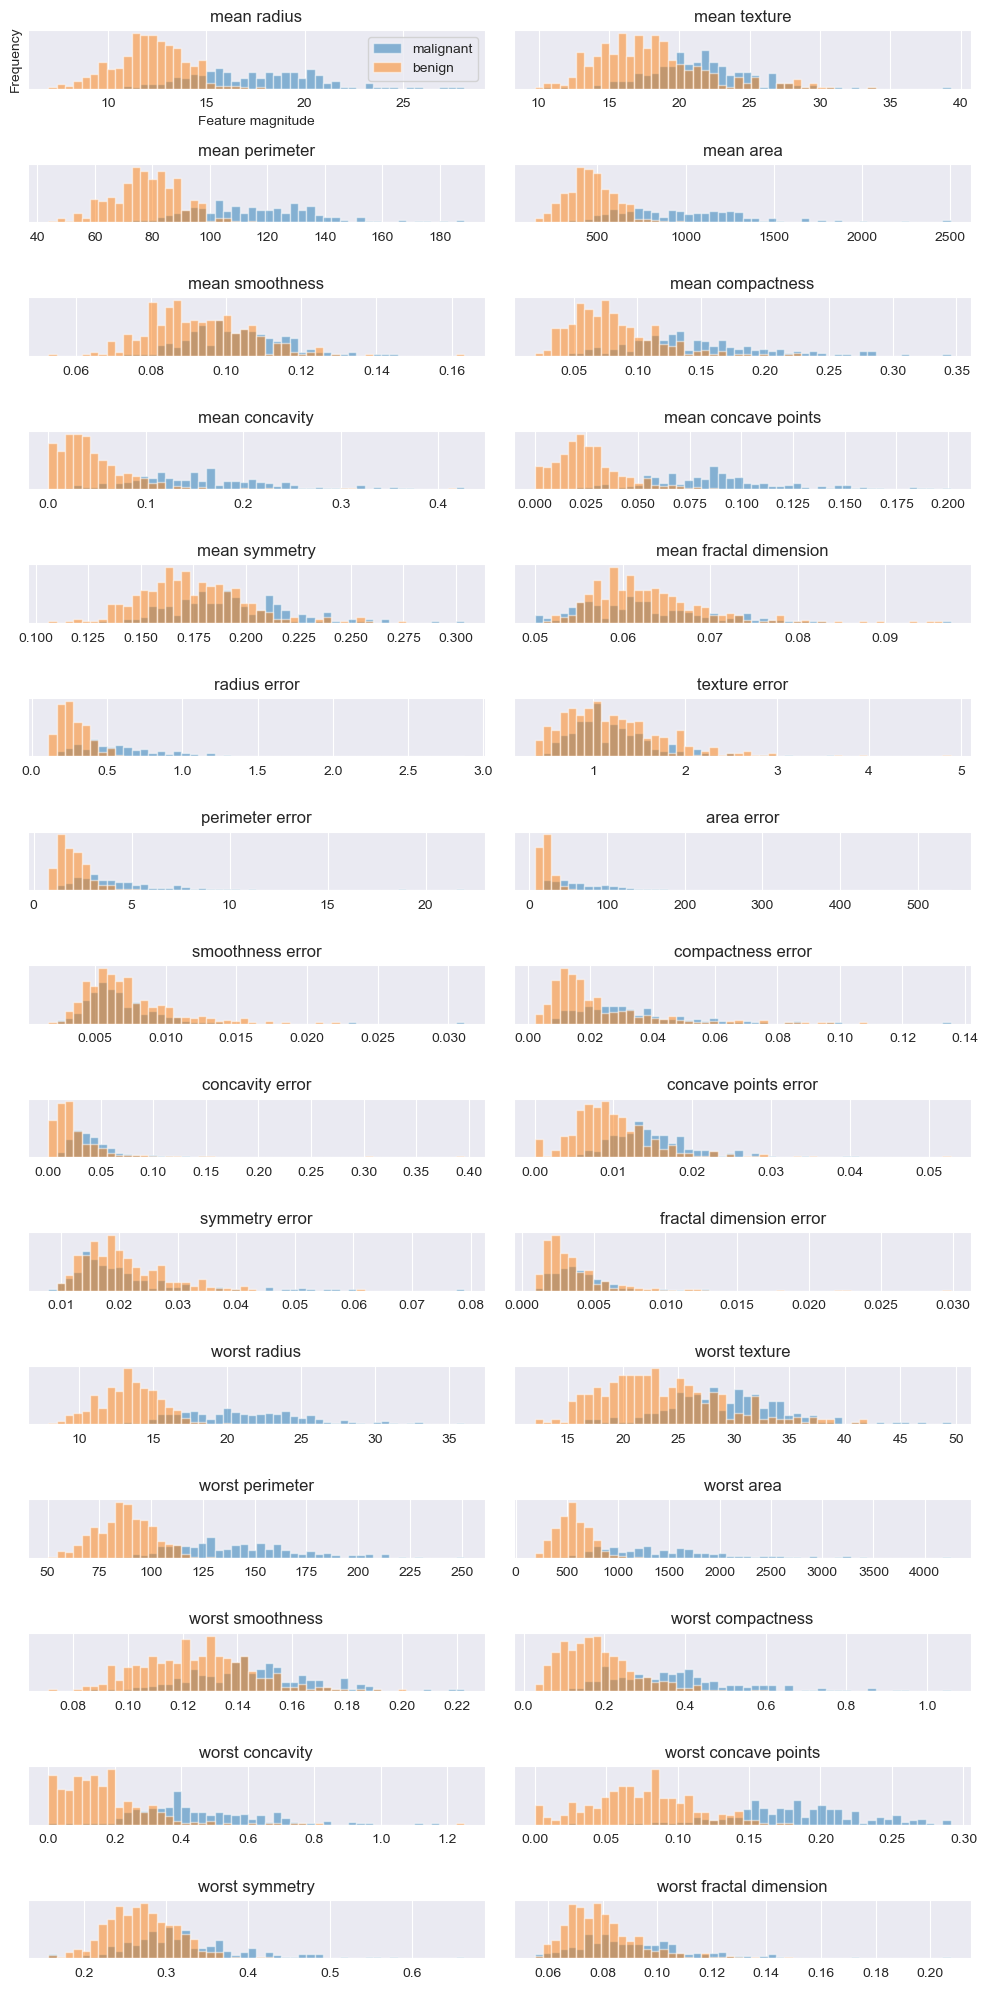

In [13]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    ax[i].hist(malignant[:, i], bins=bins, alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, alpha=.5) 
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Each plot overlays two histograms, one for all of the points in the benign class and one for all the points in the malignant class.Each bin has the total count of how often a data point appears with a feature for that bin range. By looking at these histograms, we can observe given a feature, whether there is a clear difference between malignant and benign classes.

#### Interpret the histogram. Are there any features that are informative, and not so informative? Fill in the cell below:

edit here:

> Informative example:

> Noninformative example: 

## Preprocessing before PCA 

#### Before PCA scale the data so that each feature has unit variance using StandardScaler:

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler
X_scaled = scaler.fit_transform(cancer.features)

AttributeError: features

## Apply PCA 

Import PCA from sklearn, and find out the first 2 principal components. Use 

```PCA.fit()``` find the principal components by calling the fit method

```PCA.transform()``` apply the rotation and dimensionality reduction by calling transform method

In [22]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA()
# fit PCA model to breast cancer data 
X_pca = pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_pca)
# 
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

NameError: name 'X_scaled' is not defined

#### Plot the first and second principle components, color code using target labels

In [ ]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[cancer.target == 0, 0], X_pca[cancer.target == 0, 1], marker='x',c='r')
plt.scatter(X_pca[cancer.target == 1, 0], X_pca[cancer.target == 1, 1], marker='+',c='g')

plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [ ]:
print("PCA component shape: {}".format(pca.components_.shape))

In [ ]:
print("PCA components:\n{}".format(pca.components_))

#### Visualize the coefficients using a heat map

In [ ]:
plt.matshow(pca.components_)
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

Interpretation:
    
> The first principal component: all features have the same sign (it’s positive, direction doesn’t matter). That means that there is a general correlation between all features. As one measurement is high, the others are likely to be high as well. 

> The second principal component has mixed signs. 

> Both of the components involve all of the 30 features, which makes it difficult to interpret.

#### Review the PCA results

In [ ]:
print (pca.explained_variance_ratio_)
print (round(sum(pca.explained_variance_ratio_),2)*100,"%")

#### Interpret the result!

In [1]:
# >> your comments here



